## Basic use

In [ ]:
# import the necessary modules
from utils import load_image
from image_matcher import ImageMatcher
# for visuals
import viz2d
import matplotlib.pyplot as plt

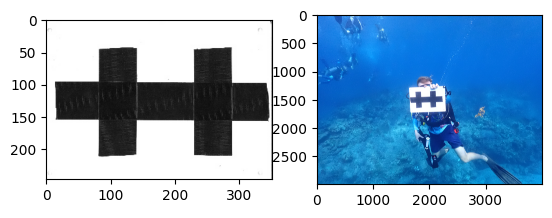

In [2]:
# load your images
template_path = 'example_data/slate.jpg'
cal_path = 'example_data/cal.jpg'

template_img = load_image(template_path)
cal_img = load_image(cal_path)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(plt.imread(template_path))
axarr[1].imshow(plt.imread(cal_path))
plt.show()

In [3]:
# pass them through the inference object
matcher = ImageMatcher(template_img, com_license=False)
template_matches, cal_matches = matcher(cal_img)
print(f"All keypoints in the calibration image with a match: {cal_matches.shape}")
print(f"The respective keypoints in the template image matched with the calibration image: {template_matches.shape}")

All keypoints in the calibration image with a match: torch.Size([31, 2])
The respective keypoints in the template image matched with the calibration image: torch.Size([31, 2])


In [4]:
# you can pair them up
pairs = [[s,c] for s,c in zip(template_matches, cal_matches)]
print(f"Pairs: ({len(pairs)},{len(pairs[0])},{len(pairs[0][0])})")

Pairs: (31,2,2)


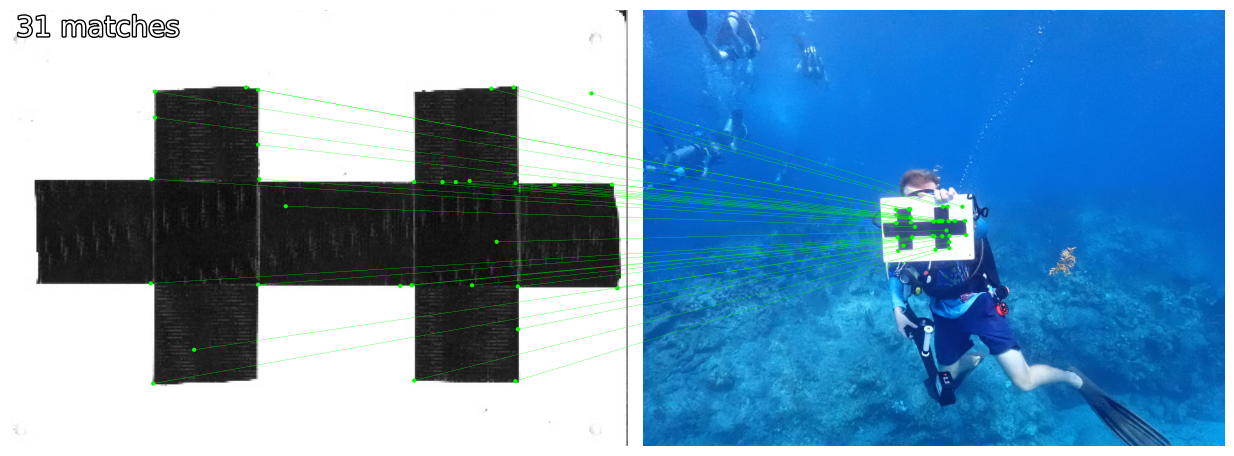

In [5]:
# or visualize them
viz2d.plot_images([template_img, cal_img])
viz2d.plot_matches(template_matches, cal_matches, color="lime", lw=0.2)
viz2d.add_text(0, f'{len(cal_matches)} matches', fs=20)
plt.show()

## Advanced use

In [6]:
# you can edit the configs
processing_conf = {
    'preprocess': {
        'gamma': 2.3,
        'sharpness': 0.5,
        'scale': 1.5
    },
    'matcher': {
        'filter_threshold': 0.65
    }
} # just a few options shown

In [7]:
# make a new matcher object
matcher2 = ImageMatcher(template_img, com_license=False, processing_conf=processing_conf)
# process your image
template_matches2, cal_matches2 = matcher2(cal_img)

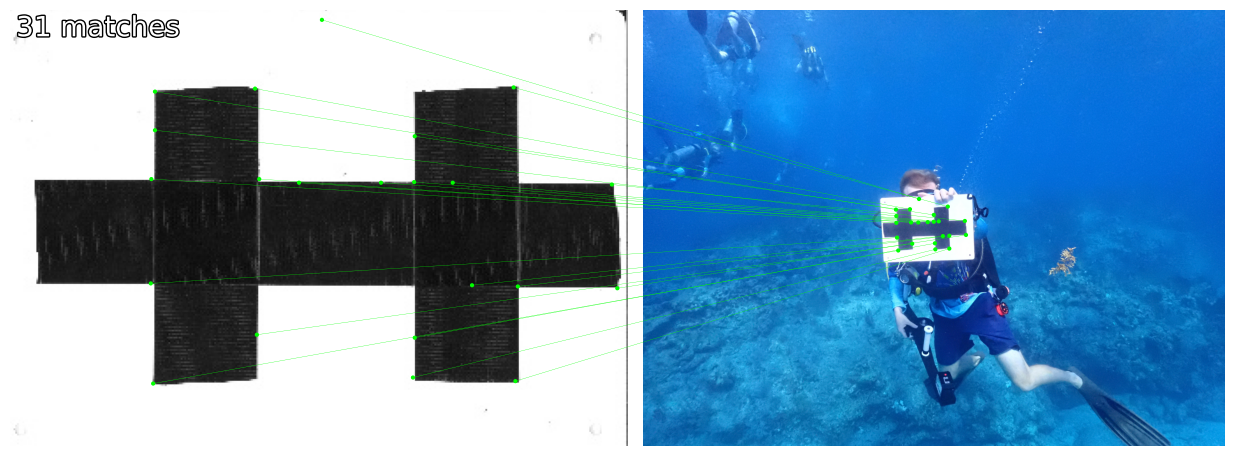

In [8]:
# visualize your new matches
viz2d.plot_images([template_img, cal_img])
viz2d.plot_matches(template_matches2, cal_matches2, color="lime", lw=0.2)
viz2d.add_text(0, f'{len(cal_matches)} matches', fs=20)
plt.show()